In [31]:
#!pip install snorkel

In [1]:
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub
from tensorflow import keras
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import MajorityLabelVoter, RandomVoter, LabelModel



from snorkel.labeling import labeling_function
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc


In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [2]:
print(tf. __version__, np. __version__)

2.1.0 1.17.0


In [3]:
print(tf. __version__)

2.1.0


In [4]:
DATA_FOLDER = "../data/clinic/data_small/"
os.listdir(DATA_FOLDER)

['val.csv',
 'oos_test.csv',
 'test.csv',
 'oos_train.csv',
 'oos_val.csv',
 'train.csv']

In [12]:
df_train = pd.read_csv(DATA_FOLDER + 'train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7500 non-null   object
 1   intent  7500 non-null   object
dtypes: object(2)
memory usage: 117.3+ KB


In [13]:
df_valid = pd.read_csv(DATA_FOLDER + 'val.csv')
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   intent  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


In [14]:
df_test = pd.read_csv(DATA_FOLDER + 'test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4500 non-null   object
 1   intent  4500 non-null   object
dtypes: object(2)
memory usage: 70.4+ KB


In [15]:
labels = {k:i for i,k in enumerate(set(df_train['intent'].tolist()))}
labels

{'current_location': 0,
 'date': 1,
 'international_fees': 2,
 'lost_luggage': 3,
 'whisper_mode': 4,
 'plug_type': 5,
 'credit_limit': 6,
 'pto_used': 7,
 'make_call': 8,
 'directions': 9,
 'report_fraud': 10,
 'spending_history': 11,
 'share_location': 12,
 'new_card': 13,
 'who_made_you': 14,
 'expiration_date': 15,
 'payday': 16,
 'gas': 17,
 'flight_status': 18,
 'travel_alert': 19,
 'what_are_your_hobbies': 20,
 'what_can_i_ask_you': 21,
 'travel_notification': 22,
 'calendar_update': 23,
 'meal_suggestion': 24,
 'nutrition_info': 25,
 'calories': 26,
 'pay_bill': 27,
 'replacement_card_duration': 28,
 'credit_limit_change': 29,
 'next_holiday': 30,
 'timezone': 31,
 'pto_balance': 32,
 'are_you_a_bot': 33,
 'transactions': 34,
 'gas_type': 35,
 'measurement_conversion': 36,
 'todo_list_update': 37,
 'alarm': 38,
 'damaged_card': 39,
 'exchange_rate': 40,
 'balance': 41,
 'repeat': 42,
 'taxes': 43,
 'application_status': 44,
 'pto_request': 45,
 'fun_fact': 46,
 'freeze_account'

In [39]:
label_list = [k.replace('_',' ') for k in labels.keys()]

In [105]:
l_access_request = 'Access Request'
l_action_request ='Action request'
l_asking_for_information ='Asking for Information'
l_clarify_issue='Clarify Issue'
l_general_statement='General Statement'
l_issue_error_problem='Issue Error problem'
l_need_support_person_help='Need support person help'
l_benefits_question = 'benefits Question'

In [16]:
df_train['label_number'] = df_train['intent'].apply(lambda x: labels.get(x,-1))
df_valid['label_number'] = df_valid['intent'].apply(lambda x: labels.get(x,-1))
df_test['label_number'] = df_test['intent'].apply(lambda x: labels.get(x,-1))

In [17]:
len(df_train),  len(df_test), len(df_valid)

(7500, 4500, 3000)

In [18]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [42]:
df_train['text'][0]

'tell me the expiration date for my current credit card'

In [43]:
res = classifier(df_train['text'][0], label_list)

In [44]:
for l, s in zip(res['labels'], res['scores']):
    print(l,round(s,2))

expiration date 0.11
pto request status 0.09
what can i ask you 0.07
change language 0.07
date 0.07
pto request 0.06
reminder 0.05
make call 0.04
reminder update 0.03
translate 0.02
directions 0.02
text 0.01
share location 0.01
maybe 0.01
pto balance 0.01
change accent 0.01
repeat 0.01
plug type 0.01
pto used 0.01
order 0.01
replacement card duration 0.01
order status 0.01
sync device 0.01
min payment 0.01
goodbye 0.01
definition 0.01
spending history 0.01
reset settings 0.01
routing 0.01
balance 0.01
credit limit 0.0
no 0.0
timer 0.0
time 0.0
fun fact 0.0
change volume 0.0
change speed 0.0
freeze account 0.0
travel alert 0.0
bill balance 0.0
transactions 0.0
mpg 0.0
credit limit change 0.0
jump start 0.0
w2 0.0
rewards balance 0.0
pay bill 0.0
whisper mode 0.0
find phone 0.0
carry on 0.0
bill due 0.0
accept reservations 0.0
transfer 0.0
last maintenance 0.0
redeem rewards 0.0
uber 0.0
application status 0.0
travel suggestion 0.0
update playlist 0.0
smart home 0.0
todo list 0.0
user na

In [45]:
df_train['text'][1]

'would you disconnect from my phone'

In [46]:
res = classifier(df_train['text'][1], label_list)

In [47]:
for l, s in zip(res['labels'], res['scores']):
    print(l,round(s,2))

distance 0.08
change language 0.07
pto request 0.06
cancel 0.05
pto request status 0.05
card declined 0.05
goodbye 0.04
what can i ask you 0.04
account blocked 0.03
maybe 0.03
transfer 0.03
find phone 0.02
no 0.02
confirm reservation 0.02
accept reservations 0.02
pto balance 0.02
pto used 0.02
change accent 0.02
reset settings 0.01
sync device 0.01
change user name 0.01
translate 0.01
plug type 0.01
balance 0.01
reminder 0.01
mpg 0.01
w2 0.01
text 0.01
order status 0.01
freeze account 0.01
change speed 0.01
share location 0.01
change ai name 0.01
user name 0.01
order 0.01
cancel reservation 0.01
routing 0.01
replacement card duration 0.01
current location 0.01
change volume 0.0
definition 0.0
repeat 0.0
application status 0.0
damaged card 0.0
min payment 0.0
alarm 0.0
apr 0.0
yes 0.0
uber 0.0
make call 0.0
jump start 0.0
timer 0.0
time 0.0
whisper mode 0.0
pin change 0.0
gas type 0.0
rewards balance 0.0
timezone 0.0
new card 0.0
tell joke 0.0
date 0.0
transactions 0.0
thank you 0.0
las

In [147]:
from snorkel.labeling import labeling_function

ABSTAIN = -1

@labeling_function()
def r1(x):
    pass

@labeling_function()
def r2(x):
    pass



In [148]:
lfs = [r1, r2, r3, r4, r5, r6, r7, r8,r9,r10, r11, r12, r13, r14, r15, r16, r17, r18]

applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df_train)

100%|██████████| 1600/1600 [00:00<00:00, 4043.30it/s]


In [149]:
coverages = (L_train != ABSTAIN).mean(axis=0)
print("Coverages:")
for  cov, lf in zip(coverages, lfs):
    print("  {}: {:.2f}%".format(lf.name, 100*cov))

Coverages:
  r1: 0.50%
  r2: 2.25%
  r3: 99.25%
  r4: 21.62%
  r5: 0.19%
  r6: 0.88%
  r7: 0.81%
  r8: 0.19%
  r9: 0.00%
  r10: 0.00%
  r11: 0.00%
  r12: 0.00%
  r13: 0.00%
  r14: 0.12%
  r15: 0.00%
  r16: 0.00%
  r17: 0.00%
  r18: 0.12%


In [150]:
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
r1,0,[1],0.005000,0.001875,0.000625
r2,1,[1],0.022500,0.022500,0.021250
r3,2,[2],0.992500,0.253125,0.021250
r4,3,[2],0.216250,0.215625,0.003750
r5,4,[2],0.001875,0.001875,0.000000
r6,5,[2],0.008750,0.008750,0.000000
r7,6,[2],0.008125,0.008125,0.000625
r8,7,[2],0.001875,0.001875,0.000000
r9,8,[],0.000000,0.000000,0.000000
r10,9,[],0.000000,0.000000,0.000000


In [151]:
random_voter = RandomVoter(cardinality=3)
preds_train = random_voter.predict(L=L_train)

In [152]:
majority_model = MajorityLabelVoter(cardinality=3)
preds_train = majority_model.predict(L=L_train)

In [153]:
label_model = LabelModel(cardinality=3, verbose=True)
label_model.fit(L_train=L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
  0%|          | 0/500 [00:00<?, ?epoch/s]INFO:root:[0 epochs]: TRAIN:[loss=0.632]
INFO:root:[100 epochs]: TRAIN:[loss=0.001]
 31%|███       | 155/500 [00:00<00:00, 1547.64epoch/s]INFO:root:[200 epochs]: TRAIN:[loss=0.001]
INFO:root:[300 epochs]: TRAIN:[loss=0.000]
100%|██████████| 500/500 [00:00<00:00, 1534.59epoch/s]
INFO:root:Finished Training


In [154]:
L_test = applier.apply(df=df_test)

100%|██████████| 800/800 [00:00<00:00, 3856.67it/s]


In [155]:
random_model_acc = random_voter.score(L=L_test, Y=df_test['label_number'], tie_break_policy="random")["accuracy"]
print(f"{'Random Model Accuracy:':<25} {random_model_acc * 100:.1f}%")

majority_acc = majority_model.score(L=L_test, Y=df_test['label_number'], tie_break_policy="random")["accuracy"]
print(f"{'Majority Vote Accuracy:':<25} {majority_acc * 100:.1f}%")

label_model_acc = label_model.score(L=L_test, Y=df_test['label_number'], tie_break_policy="random")["accuracy"]
print(f"{'Label Model Accuracy:':<25} {label_model_acc * 100:.1f}%")

Random Model Accuracy:    32.1%
Majority Vote Accuracy:   34.0%
Label Model Accuracy:     33.8%


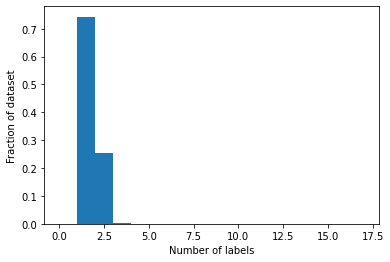

In [156]:
def plot_label_frequency(L):
    plt.hist((L != ABSTAIN).sum(axis=1), density=True, bins=range(L.shape[1]))
    plt.xlabel("Number of labels")
    plt.ylabel("Fraction of dataset")
    plt.show()


plot_label_frequency(L_train)

OBSERVATION:
 - Most of labels doesnot triggered
 - Label 1 has the highest coverage and effect

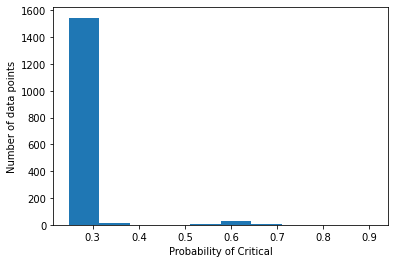

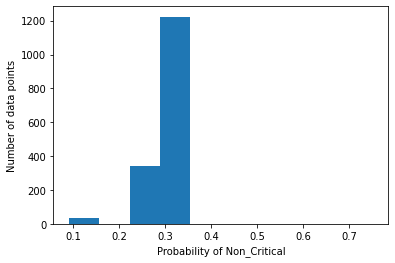

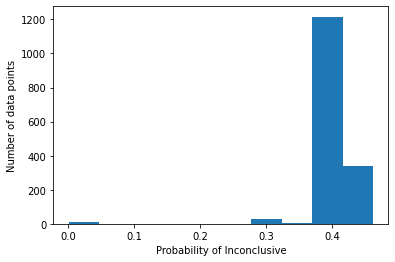

In [157]:

def plot_probabilities_histogram(Y, col):
    plt.hist(Y, bins=10)
    plt.xlabel("Probability of " + col)
    plt.ylabel("Number of data points")
    plt.show()


probs_train = label_model.predict_proba(L=L_train)
plot_probabilities_histogram(probs_train[:, Critical], 'Critical')
plot_probabilities_histogram(probs_train[:, Non_Critical], 'Non_Critical')
plot_probabilities_histogram(probs_train[:, Inconclusive], 'Inconclusive')

In [ ]:
from snorkel.labeling import filter_unlabeled_dataframe

df_train_filtered, probs_train_filtered = filter_unlabeled_dataframe(
    X=df_train, y=probs_train, L=L_train
)
df_train_filtered[['text','label', 'label1','label2']]

/Users/tayfun.tuna/opt/anaconda3/envs/astra/lib/python3.6/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:>

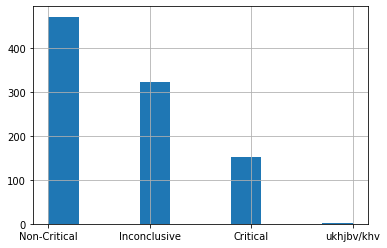

In [167]:
df_train_filtered['label1'].fillna('no-label',inplace=True)
df_train_filtered['label2'].fillna('no-label',inplace=True)

df_train_filtered[['text','label', 'label1','label2']][df_train_filtered['label1']=='no-label']['label'].hist()

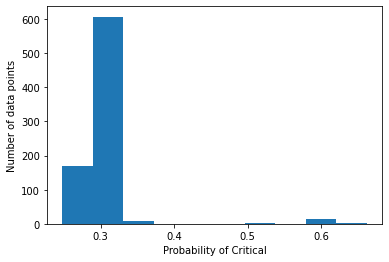

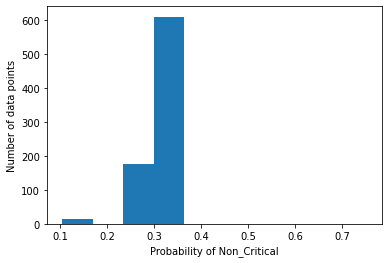

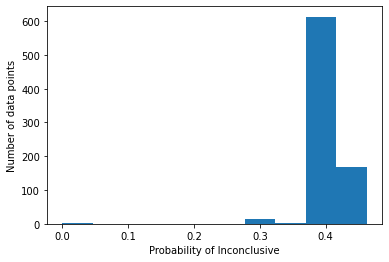

In [159]:
probs_train = label_model.predict_proba(L=L_test)
plot_probabilities_histogram(probs_train[:, Critical], 'Critical')
plot_probabilities_histogram(probs_train[:, Non_Critical], 'Non_Critical')
plot_probabilities_histogram(probs_train[:, Inconclusive], 'Inconclusive')

In [180]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 3))
X_train = vectorizer.fit_transform(df_train_filtered.text.tolist())
X_test = vectorizer.transform(df_test.text.tolist())

In [181]:
from snorkel.utils import probs_to_preds

preds_train_filtered = probs_to_preds(probs=probs_train_filtered)


In [182]:
from sklearn.linear_model import LogisticRegression

sklearn_model = LogisticRegression(C=1, solver="liblinear")
sklearn_model.fit(X=X_train, y=preds_train_filtered)

/Users/tayfun.tuna/opt/anaconda3/envs/astra/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
X_train.shape, preds_train_filtered.shape

((1599, 152925), (1599,))

In [ ]:
df_test

In [ ]:
print(f"Test Accuracy: {sklearn_model.score(X=X_test, y=df_test['label_number'].values) * 100:.3f}%")


In [197]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

def clf_metric_AImp(y_test,y_pred, y_pred_prob, T_num):
    res = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    roc_list = []
    occ_list = []
    prc_list = []
    tgt_list = []
    igr = 0
    for tgt in range(T_num):
        y_test2 = [1 if i == tgt else 0 for i in y_test]
        y_pred2 = [1 if i == tgt else 0 for i in y_pred]
        y_pred_prob2 = [i[tgt] for i in y_pred_prob]
        try:
            roc_list.append(roc_auc_score(y_test2, y_pred_prob2))
            occ_list.append((y_test == tgt).sum())
            precision, recall, thresholds = precision_recall_curve(y_test2, y_pred_prob2)
            prc_list.append(auc(recall, precision))
            tgt_list.append(str(tgt))
        except ValueError:
            print("Only one class present in y_test2. Ignoring this class")
            igr = igr + 1
    
    roc_macro = np.average(roc_list)
    roc_weighted = np.average(roc_list, weights=occ_list)
    prc_macro = np.average(prc_list)
    prc_weighted = np.average(prc_list, weights=occ_list)
    
    df_roc_prc = pd.DataFrame(list(zip(roc_list, prc_list)),index = tgt_list,
               columns =['AUROC', 'AUPRC'])
    df_roc_prc.loc['accuracy'] = [None, None]
    df_roc_prc.loc['macro avg'] = [roc_macro, prc_macro]
    df_roc_prc.loc['weighted avg'] = [roc_weighted, prc_weighted]

    res = pd.concat([res, df_roc_prc], axis=1)
    res.at["accuracy","precision"] = None
    res.at["accuracy","recall"] = None
    res.at["accuracy","support"] = max(res.support)
    res = res[res.support != 0]
    return res, igr


In [198]:
sklearn_model.predict_proba(X_test)

array([[3.12862002e-05, 5.38137717e-05, 9.99914900e-01],
       [1.78566820e-05, 4.62629446e-04, 9.99519514e-01],
       [8.48665677e-04, 1.63651089e-03, 9.97514823e-01],
       ...,
       [1.80444938e-04, 2.85580016e-02, 9.71261553e-01],
       [1.99933176e-07, 1.49158935e-03, 9.98508211e-01],
       [5.51724263e-06, 4.60784422e-05, 9.99948404e-01]])

In [199]:
T_num = 3 #Number of classes
y_pred_prob = sklearn_model.predict_proba(X_test)
y_test = df_test['label_number'].values
y_pred = sklearn_model.predict(X_test)
res, igr = clf_metric_AImp(y_test,y_pred, y_pred_prob, T_num)
res

/Users/tayfun.tuna/opt/anaconda3/envs/astra/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1-score,support,AUROC,AUPRC
0,0.000000,0.000000,0.000000,402.0,0.552851,0.553673
1,0.250000,0.008065,0.015625,124.0,0.483143,0.153164
2,0.341709,0.992701,0.508411,274.0,0.570342,0.397587
accuracy,NaN,NaN,0.341250,800.0,NaN,NaN
macro avg,0.197236,0.333588,0.174679,800.0,0.535446,0.368141
weighted avg,0.155785,0.341250,0.176553,800.0,0.548037,0.438135


In [88]:
import random

import nltk
from nltk.corpus import wordnet as wn

from snorkel.augmentation import transformation_function

nltk.download("wordnet", quiet=True)


def get_synonyms(word):
    """Get the synonyms of word from Wordnet."""
    lemmas = set().union(*[s.lemmas() for s in wn.synsets(word)])
    return list(set(l.name().lower().replace("_", " ") for l in lemmas) - {word})


@transformation_function()
def tf_replace_word_with_synonym(x):
    """Try to replace a random word with a synonym."""
    words = x.text.lower().split()
    idx = random.choice(range(len(words)))
    synonyms = get_synonyms(words[idx])
    if len(synonyms) > 0:
        x.text = " ".join(words[:idx] + [synonyms[0]] + words[idx + 1 :])
        return x

In [89]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier

tf_policy = ApplyOnePolicy(n_per_original=0, keep_original=True)
tf_applier = PandasTFApplier([tf_replace_word_with_synonym], tf_policy)
df_train_augmented = tf_applier.apply(df_train2)


100%|██████████| 4554/4554 [00:00<00:00, 10683.32it/s]


In [90]:
df_train_augmented.shape

(4554, 3)

In [ ]:
df_train_augmented.head()

In [54]:
#GUSE embedding for classification model

In [92]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [93]:
%%time
tr_embed = []

i = 0
while(i < df_train_augmented.shape[0]-10):
    tr_embed.append(embed(df_train_augmented.text[i:i+10]).tolist())
    i+= 10
    #print(i)
else:
    tr_embed.append(embed(df_train_augmented.text[i:]).tolist())

tr_embed2 = []
for x in tr_embed:
    for y in x:
        tr_embed2.append(y)

        
df_emb = pd.DataFrame(tr_embed2, columns = ["vec" + str(i) for i in range(512)])

temp =  df_train_augmented[["sys_id","label"]].copy()
temp = temp.reset_index(drop=True)

df_emb = pd.concat([df_emb, temp], axis=1)
df_emb.head()

CPU times: user 2min 19s, sys: 1min 7s, total: 3min 27s
Wall time: 54.2 s


,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec504,vec505,vec506,vec507,vec508,vec509,vec510,vec511,sys_id,label
0,-0.059866,-0.001436,-0.109919,-0.095510,0.074394,-0.025056,0.085519,-0.034903,0.045007,0.064680,...,0.103880,-0.006976,0.028728,0.021821,-0.081722,0.038529,0.065333,0.031073,2148,0
1,-0.027004,0.013067,-0.085010,-0.033053,0.027256,0.016147,0.071584,-0.003178,0.067493,0.012164,...,0.096953,0.048307,-0.024828,-0.034587,-0.039312,0.090378,-0.013480,0.001796,1911,0
2,0.021272,0.033173,0.011312,0.024171,0.078843,0.010647,0.041389,0.009457,-0.014883,0.036849,...,0.075960,-0.075504,0.019888,-0.041388,-0.002503,0.004291,0.012759,0.037707,8783,1
3,-0.015789,0.028990,-0.001349,-0.052206,0.054239,-0.048980,-0.022582,0.104886,-0.003501,0.056325,...,0.054130,-0.028953,0.085035,0.059622,-0.003623,0.022781,0.070689,-0.022480,9409,0
4,-0.001484,0.017850,0.007739,0.077527,0.041264,-0.065037,0.064227,0.000619,-0.072233,0.107032,...,0.065416,-0.024670,-0.045834,0.094015,0.011115,0.012767,-0.072835,0.016259,9352,0


In [94]:
x_train, x_test, y_train, y_test = train_test_split(df_emb[["vec" + str(i) for i in range(512)]  ], 
                                                    df_emb.label, 
                                                    test_size=0.2,  
                                                    random_state=1,
                                                    stratify = df_emb.label)

In [95]:
cl_model = tf.keras.models.Sequential()
# cl_model.add(tf.keras.layers.Dense(512, input_dim = 512,activation='sigmoid'))
# cl_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
initializer = tf.keras.initializers.Identity()
#base_model.add(tf.keras.layers.Dense())
cl_model.add(tf.keras.layers.Dense(512,input_dim = 512,activation=None,trainable=False,kernel_initializer=initializer))#activation="relu"))
# cl_model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
# cl_model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
cl_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
cl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)
    
cl_model.fit(x_train.values,y_train.values, batch_size = 100,epochs=1000,validation_data=(x_test.values,y_test.values),callbacks =[earlystopping])



Epoch 1/1000
37/37 [==============================] - 1s 6ms/step - loss: 0.6750 - accuracy: 0.6865 - val_loss: 0.6502 - val_accuracy: 0.8035
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.8007 - val_loss: 0.6128 - val_accuracy: 0.8244
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.8240 - val_loss: 0.5807 - val_accuracy: 0.8397
Epoch 4/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.8435 - val_loss: 0.5526 - val_accuracy: 0.8474
Epoch 5/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.8501 - val_loss: 0.5280 - val_accuracy: 0.8573
Epoch 6/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.8526 - val_loss: 0.5061 - val_accuracy: 0.8650
Epoch 7/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.8553 - val_loss: 0.4869 - val_accuracy: 0.8672
Epoch 

37/37 [==============================] - 0s 3ms/step - loss: 0.2413 - accuracy: 0.9122 - val_loss: 0.2455 - val_accuracy: 0.9144
Epoch 116/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.9124 - val_loss: 0.2453 - val_accuracy: 0.9144
Epoch 117/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9130 - val_loss: 0.2449 - val_accuracy: 0.9144
Epoch 118/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9127 - val_loss: 0.2445 - val_accuracy: 0.9144
Epoch 119/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9130 - val_loss: 0.2442 - val_accuracy: 0.9144
Epoch 120/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9133 - val_loss: 0.2439 - val_accuracy: 0.9144
Epoch 121/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2385 - accuracy: 0.9135 - val_loss: 0.2436 - val_accuracy: 0.9144
Epoch 1

Epoch 172/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9209 - val_loss: 0.2325 - val_accuracy: 0.9177
Epoch 173/1000
37/37 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9207 - val_loss: 0.2323 - val_accuracy: 0.9166
Epoch 174/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9201 - val_loss: 0.2322 - val_accuracy: 0.9144
Epoch 175/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9207 - val_loss: 0.2320 - val_accuracy: 0.9177
Epoch 176/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9207 - val_loss: 0.2318 - val_accuracy: 0.9166
Epoch 177/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9207 - val_loss: 0.2317 - val_accuracy: 0.9144
Epoch 178/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9207 - val_loss: 0.2315 - val_accuracy:

Epoch 229/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9229 - val_loss: 0.2257 - val_accuracy: 0.9188
Epoch 230/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9226 - val_loss: 0.2256 - val_accuracy: 0.9188
Epoch 231/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9229 - val_loss: 0.2254 - val_accuracy: 0.9188
Epoch 232/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9229 - val_loss: 0.2254 - val_accuracy: 0.9188
Epoch 233/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9231 - val_loss: 0.2252 - val_accuracy: 0.9199
Epoch 234/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9226 - val_loss: 0.2251 - val_accuracy: 0.9188
Epoch 235/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9229 - val_loss: 0.2251 - val_accuracy:

Epoch 286/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9267 - val_loss: 0.2218 - val_accuracy: 0.9199
Epoch 287/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1962 - accuracy: 0.9264 - val_loss: 0.2219 - val_accuracy: 0.9199
Epoch 288/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9264 - val_loss: 0.2217 - val_accuracy: 0.9199
Epoch 289/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9264 - val_loss: 0.2217 - val_accuracy: 0.9199
Epoch 290/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9275 - val_loss: 0.2217 - val_accuracy: 0.9199
Epoch 291/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9270 - val_loss: 0.2216 - val_accuracy: 0.9199
Epoch 292/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.9267 - val_loss: 0.2216 - val_accuracy:

Epoch 343/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9300 - val_loss: 0.2199 - val_accuracy: 0.9166
Epoch 344/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9297 - val_loss: 0.2199 - val_accuracy: 0.9166
Epoch 345/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9300 - val_loss: 0.2198 - val_accuracy: 0.9166
Epoch 346/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9295 - val_loss: 0.2199 - val_accuracy: 0.9166
Epoch 347/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9289 - val_loss: 0.2199 - val_accuracy: 0.9166
Epoch 348/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.9295 - val_loss: 0.2199 - val_accuracy: 0.9166
Epoch 349/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9297 - val_loss: 0.2199 - val_accuracy:

Epoch 400/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9316 - val_loss: 0.2192 - val_accuracy: 0.9166
Epoch 401/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9319 - val_loss: 0.2192 - val_accuracy: 0.9166
Epoch 402/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9325 - val_loss: 0.2192 - val_accuracy: 0.9166
Epoch 403/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9322 - val_loss: 0.2191 - val_accuracy: 0.9166
Epoch 404/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9319 - val_loss: 0.2191 - val_accuracy: 0.9166
Epoch 405/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9327 - val_loss: 0.2191 - val_accuracy: 0.9166
Epoch 406/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9330 - val_loss: 0.2191 - val_accuracy:

In [96]:
%%time
holdout = pd.read_csv("/Users/dinesh.surapaneni/OneDrive - ServiceNow/Snorkel/data/holdout.csv",encoding='latin-1')
holdout["label"] = holdout["label"].replace("undecided", "non-critical")
holdout["label_bn"] = [1 if i == "critical" else 0 for i in holdout.label ]

tt_embed = []
i = 0
while(i < holdout.shape[0]-10):
    tt_embed.append(embed(holdout.text[i:i+10]).tolist())
    i+= 10
    #print(i)
else:
    tt_embed.append(embed(holdout.text[i:]).tolist())

tt_embed2 = []
for x in tt_embed:
    for y in x:
        tt_embed2.append(y)

        
df_emb_hold = pd.DataFrame(tt_embed2, columns = ["vec" + str(i) for i in range(512)])


CPU times: user 52 s, sys: 28.5 s, total: 1min 20s
Wall time: 18.5 s


In [97]:
_, accu = cl_model.evaluate(df_emb_hold.values, holdout.label_bn,verbose=0)
print('Accuracy: %.2f' % (accu*100))

Accuracy: 55.59


In [98]:
holdout["pred"] = [1 if i > 0.50 else 0 for i in cl_model.predict(df_emb_hold.values)]

In [99]:
data_crosstab = pd.crosstab(holdout["label_bn"],
                            holdout["pred"], 
                               margins = False)
print(data_crosstab)

pred         0    1
label_bn           
0         1058  792
1          117   80


In [101]:
#For binary classifier
T_num = 2 #Number of classes
y_pred_prob = np.array([np.concatenate([1-prb,prb]) for prb in cl_model.predict(df_emb_hold.values)])
y_test = holdout["label_bn"]
y_pred = [1 if i > 0.50 else 0 for i in cl_model.predict(df_emb_hold.values)]
res, igr = clf_metric_AImp(y_test,y_pred, y_pred_prob, T_num)
res

,precision,recall,f1-score,support,AUROC,AUPRC
0,0.900426,0.571892,0.699504,1850.0,0.496812,0.910732
1,0.091743,0.406091,0.149673,197.0,0.496812,0.090249
accuracy,NaN,NaN,0.555936,2047.0,NaN,NaN
macro avg,0.496084,0.488992,0.424588,2047.0,0.496812,0.500491
weighted avg,0.822599,0.555936,0.646589,2047.0,0.496812,0.831770


In [102]:
res.to_csv("result.csv", index=True)

In [37]:
pd.DataFrame(classification_report(holdout["label_bn"], holdout["pred"], output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.934177,0.598378,0.729489,1850.000000
1,0.138051,0.604061,0.224740,197.000000
accuracy,0.598925,0.598925,0.598925,0.598925
macro avg,0.536114,0.601220,0.477115,2047.000000
weighted avg,0.857559,0.598925,0.680913,2047.000000


In [135]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="lbfgs")
clf.fit(X=df_emb[["vec" + str(i) for i in range(512)]  ].values, y=df_emb.label.values)

LogisticRegression()

In [136]:
holdout["pred_logR"] = clf.predict(df_emb_hold.values)

In [137]:
data_crosstab = pd.crosstab(holdout["label_bn"],
                            holdout["pred_logR"],
                               margins = False)
print(data_crosstab)

pred_logR    0    1
label_bn           
0          613  438
1          102   80


In [138]:
(613 + 80)/holdout.shape[0]

0.5620437956204379